In [603]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [604]:
X_train = pd.read_csv('data/train.csv', index_col='PassengerId')
X_test = pd.read_csv('data/test.csv', index_col='PassengerId')
twix = (X_train, X_test)
X_train.sample()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q


In [605]:
X_test.sample()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1283,1,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",female,51.0,0,1,PC 17592,39.4,D28,S


In [606]:
X_train.info()
print('-' * 40)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 n

In [607]:
for X in twix:
     X.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [608]:
for X in twix:
    X['status'] = X.Name.str.extract('([a-zA-Z]+)\.', expand=False)
pd.crosstab(X_train.status, X_train.Survived)

Survived,0,1
status,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [609]:
for X in twix:
    X['status'] = X['status'].replace(['Capt', 'Lady', 'Col', 
                                       'Countess', 'Don', 'Sir', 'Dr', 
                                       'Jonkheer', 'Major', 'Rev', ], 'vip')
    X['status'] = X['status'].replace(['Mlle', 'Ms', 'Mme'], 'Mrs')

In [610]:
X_train[['status', 'Survived']].groupby(['status'], as_index=False).mean()

,status,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mr,0.156673
3,Mrs,0.798450
4,vip,0.347826


In [611]:
for X in twix:
    X['status'] = X.status.map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "vip": 5})
X_train.sample()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,status
PassengerId,,,,,,,,,,
350,0,3,"Dimic, Mr. Jovan",male,42.0,0,0,8.6625,S,1


In [612]:
for X in twix:
    X.drop('Name', axis=1, inplace=True)

In [613]:
X_train.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,status
PassengerId,,,,,,,,,
637,0,3,male,32.0,0,0,7.925,S,1


In [614]:
for X in twix:
    X['Sex'] = X.Sex.map({'female': 1, 'male': 0})
X_train.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,status
PassengerId,,,,,,,,,
100,0,2,0,34.0,1,0,26.0,S,1


In [615]:
X_train.groupby(['Sex', 'Pclass']).Age.median()

Sex  Pclass
0    1         40.0
     2         30.0
     3         25.0
1    1         35.0
     2         28.0
     3         21.5
Name: Age, dtype: float64

In [616]:
for X in twix:
    for index, value in X.groupby(['Sex', 'Pclass']).Age.median().items():
        X.loc[(X['Sex'] == index[0]) & (X['Pclass'] == index[1]) & (X.Age.isna()), 'Age'] = value

In [617]:
X_train['age_group'] = pd.cut(X_train.Age, 5)
intervals = list(X_train[['age_group', 'Survived']].groupby(['age_group']).mean().index)
for i, interval in enumerate(intervals):
    for X in twix:
        X.loc[(X['Age'] >= int(interval.left)) & (X['Age'] <= int(interval.right)), 'Age'] = i

In [618]:
for X in twix:
    X.Age = X.Age.astype(np.int32)

In [619]:
X_train.query('Age == 0')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,status,age_group
PassengerId,,,,,,,,,,
8,0,3,0,0,3,1,21.0750,S,4,"(0.34, 16.336]"
10,1,2,1,0,1,0,30.0708,C,3,"(0.34, 16.336]"
11,1,3,1,0,1,1,16.7000,S,2,"(0.34, 16.336]"
15,0,3,1,0,0,0,7.8542,S,2,"(0.34, 16.336]"
17,0,3,0,0,4,1,29.1250,Q,4,"(0.34, 16.336]"
...,...,...,...,...,...,...,...,...,...,...
851,0,3,0,0,4,2,31.2750,S,4,"(0.34, 16.336]"
853,0,3,1,0,1,1,15.2458,C,2,"(0.34, 16.336]"
854,1,1,1,0,0,1,39.4000,S,2,"(0.34, 16.336]"


In [620]:
X_train.drop('age_group', axis=1, inplace=True)

In [621]:
for X in twix:
    X['family_size'] = X['SibSp'] + X['Parch'] + 1
    
(X_train[['family_size', 'Survived']].groupby('family_size', as_index=False)
 .mean().sort_values(by='Survived', ascending=False))

,family_size,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [622]:
for X in twix:
    X['is_alone'] = np.where(X.family_size == 1, 1, 0)
X_train.groupby('is_alone').Survived.mean()

is_alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [623]:
for X in twix:
    X.drop(['Parch', 'SibSp', 'family_size'], axis=1, inplace=True)
X_train.sample()

,Survived,Pclass,Sex,Age,Fare,Embarked,status,is_alone
PassengerId,,,,,,,,
643,0,3,1,0,27.9,S,2,0


In [624]:
for X in twix:
    X['age*class'] = X['Age'] * X['Pclass']
X_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,status,is_alone,age*class
PassengerId,,,,,,,,,
1,0,3,0,1,7.2500,S,1,0,3
2,1,1,1,2,71.2833,C,3,0,2
3,1,3,1,1,7.9250,S,2,1,3
4,1,1,1,2,53.1000,S,3,0,2
5,0,3,0,2,8.0500,S,1,1,6


In [625]:
port_mode = X_train.Embarked.mode()[0]

In [626]:
for X in twix:
    X['Embarked'] = X['Embarked'].fillna(port_mode)

In [627]:
X_train.groupby('Embarked').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [628]:
for X in twix:
    X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
X_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,status,is_alone,age*class
PassengerId,,,,,,,,,
1,0,3,0,1,7.2500,0,1,0,3
2,1,1,1,2,71.2833,1,3,0,2
3,1,3,1,1,7.9250,0,2,1,3
4,1,1,1,2,53.1000,0,3,0,2
5,0,3,0,2,8.0500,0,1,1,6


In [629]:
X_test.Fare.fillna(X_test.Fare.median(), inplace=True)

In [630]:
X_train['fare_group'] = pd.qcut(X_train.Fare, 4)
intervals = list(X_train.groupby('fare_group').Survived.mean().index)
for X in twix:
    for i, interval in enumerate(intervals):
        X.loc[(X['Fare'] >= interval.left) & (X['Fare'] <= interval.right), 'Fare'] = i

In [631]:
for X in twix:
    X.loc[X.Fare == X.Fare.max(), 'Fare'] = 3

In [632]:
X_train.drop('fare_group', axis=1, inplace=True)

In [633]:
X_test.status.fillna(3, inplace=True)

In [634]:
for X in twix:
    X.Fare = X.Fare.astype(np.int32)
    X.status = X.status.astype(np.int32)

In [635]:
X_train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,status,is_alone,age*class
PassengerId,,,,,,,,,
1,0,3,0,1,0,0,1,0,3
2,1,1,1,2,3,1,3,0,2
3,1,3,1,1,1,0,2,1,3
4,1,1,1,2,3,0,3,0,2
5,0,3,0,2,1,0,1,1,6
6,0,3,0,1,1,2,1,1,3
7,0,1,0,3,3,0,1,1,3
8,0,3,0,0,2,0,4,0,0
9,1,3,1,1,1,0,3,0,3


In [636]:
X_test.head(10)

,Pclass,Sex,Age,Fare,Embarked,status,is_alone,age*class
PassengerId,,,,,,,,
892,3,0,2,0,2,1,1,6
893,3,1,2,0,0,3,0,6
894,2,0,3,1,2,1,1,6
895,3,0,1,1,0,1,1,3
896,3,1,1,1,0,3,0,3
897,3,0,0,1,0,1,1,0
898,3,1,1,0,2,2,1,3
899,2,0,1,2,0,1,0,2
900,3,1,1,0,1,3,1,3


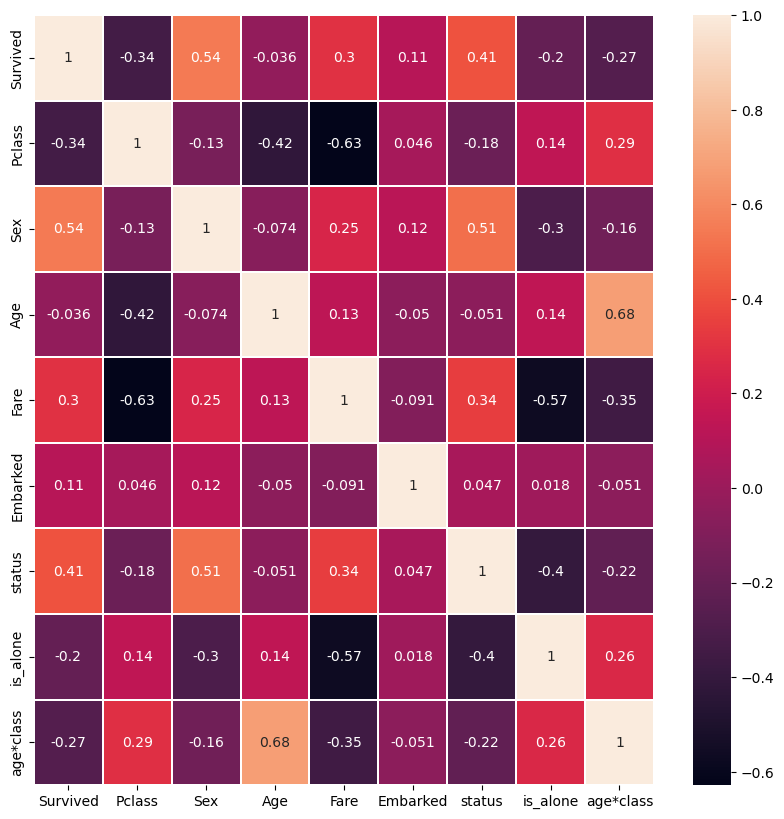

In [637]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(X_train.corr(numeric_only=True),annot=True,linewidths=.1)
plt.show()

In [638]:
X_train.to_csv("data/X_train.csv")
X_test.to_csv("data/X_test.csv")